# Selecting the Fantasy MVPs

### MSP 9.24.2017

Who are the 2017 hitting and pitching MVPs?

In [1]:
from IPython.display import HTML
HTML('''<script>code_show=true; function code_toggle() { if (code_show){ $('div.input').hide();} else { $('div.input').show(); } code_show = !code_show} $( document ).ready(code_toggle);</script><form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [1]:
# boilerplate imports

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

import matplotlib as mpl



In [2]:
# imports for scraping

from bs4 import BeautifulSoup
import requests


# basic birth year reader. tables[1] has good stuff in it!
def get_birth_year(tables):

    birthdate_start = (tables[1].text).find("Birthdate:")

    birthdate_end =  (tables[1].text).find('(',birthdate_start)

    #print (tables[1].text)[birthdate_start:birthdate_end]
    birth_year = (tables[1].text)[birthdate_start:birthdate_end].split('/')[2]
    #print birth_year
    
    return birth_year





In [3]:
# the listing of the teams of interest (all!)

teams = ['angels','astros','athletics','bluejays','braves',\
        'brewers','cardinals','cubs','diamondbacks','dodgers',\
        'giants','indians','mariners','marlins','mets','nationals',\
        'orioles','padres','phillies','pirates','rangers',\
        'rays','reds','redsox','rockies','royals','tigers','twins',\
        'whitesox','yankees']

# verify we got all the teams...
print len(teams)

30


#### Compile Hitters

This cell only needs to be run in the event that player ID numbers change, or new players are added.

In [22]:
#
# make hitter dictionary
#
HDict = {}


for team in teams:
    
    print team,
    
    get_url = 'http://www.fangraphs.com/teams/'+team#angels'

    r  = requests.get(get_url)

    data = r.text

    soup = BeautifulSoup(data)

    tables = soup.findAll('table')


    for row in tables[5].find_all("tr")[1:]: 
    
        sav = [td.find('a') for td in row.find_all("td")][0]
    
        try:
            need_url = sav.get('href')
            
            sav2 = [td.get_text() for td in row.find_all("td")]
        
            # Apply a PA cut?
            if float(sav2[3]) > 0.:
                HDict[sav.text] = need_url[(need_url).find('playerid')+9:(need_url).find('&')]
        
        except:
            pass
    
f = open('data/batterdict_full.dat','w')

for entry in HDict.keys():
    try:
        print >>f,entry,'|',HDict[entry]
    except:
        print entry,'|',HDict[entry]
    

f.close()

angels

IndexError: list index out of range

In [52]:

HDict = {}

f = open('2017data/all_batters.csv')

for line in f:
    #print line
    try:
        HDict[(line.split(',')[0]).strip()] = int(line.split(',')[4])
    except:
        pass
    
    
print('Found {} hitters by scraping teams.'.format(len(HDict.keys())))

Found 1354 hitters by scraping teams.


In [38]:
print HDict.keys()[0:10]

['Rougned Odor', 'Kevan Smith', 'Luis Garcia', 'Tim Adleman', 'David Holmberg', 'David Goforth', 'Giovanny Urshela', 'Preston Claiborne', 'T.J. House', 'Chase Anderson']


### First Application: Grabbing A Hitters AVG/OBP with age

How does a plot of avg/obp evolve with age?

In [69]:
teams_short = ['ari','atl','bal','bos','chc','cws','cin','cle','col','det',\
        'hou','kc','ana','la','mia','mil','min','nym','nyy','oak',\
              'phi','pit','sd','sf','sea','stl','tb','tex','tor','was']


players = []
pstats = {}

# 0: BATTERS  1: CLUB  2: LEAGUE  3: AVG  4: G  5: AB  6: R  7: H  8: 2B  9: 3B  10: HR  	RBI  	BB  	IBB  	SO  	SB  	CS  	OBP  	SLG  	OPS  	SF  	SAC  	HBP  	GIDP 

for team in teams_short:
    print team,
    get_url = 'http://mlb.mlb.com/milb/stats/org.jsp?id='+team

    r  = requests.get(get_url)

    data = r.text

    soup = BeautifulSoup(data)

    tables = [soup.findAll('table')[1]]

    for indx,table in enumerate(tables):

        #print indx,[th.get_text() for th in table.find("tr").find_all("th")]
    
        for row in table.find_all("tr")[1:]:

            sav = [td.get_text() for td in row.find_all("td")]
            #print [float(sav[4]),float(sav[5]),float(sav[10])]
            try:
                #print sav[2].split(',')[1]+' '+sav[2].split(',')[0]
                players.append(sav[2].split(',')[1]+' '+sav[2].split(',')[0])
                teamlist.append(team)
                pstats[(sav[2].split(',')[1]+' '+sav[2].split(',')[0]).strip()] = [float(sav[6]),float(sav[7]),float(sav[9]),float(sav[12]),float(sav[15])]
            except:
                pass

ari atl bal bos chc cws cin cle col det hou kc ana la mia mil min nym nyy oak phi pit sd sf sea stl tb tex tor was


We need some way to calibrate this: What about looking at MLB players and the stats they have accumulated?

In [87]:
nplayers = 0
for pp in np.unique(players):
    #print pp
    if pp.strip() in HDict.keys():
        print pp.strip(),pstats[pp.strip()],HDict[pp.strip()]
        nplayers += 1
        
print nplayers

Adonis Garcia [30.0, 119.0, 40.0, 2.0, 1.0] 183
Allen Cordoba [17.0, 55.0, 13.0, 1.0, 0.0] 227
Andres Blanco [43.0, 164.0, 52.0, 4.0, 2.0] 144
Anthony Alford [26.0, 105.0, 37.0, 2.0, 0.0] 8
Anthony Santander [18.0, 72.0, 15.0, 1.0, 0.0] 31
Billy Burns [29.0, 123.0, 33.0, 0.0, 0.0] 6
Blake Swihart [9.0, 27.0, 11.0, 0.0, 0.0] 7
Breyvic Valera [22.0, 74.0, 19.0, 0.0, 2.0] 11
Brock Stassi [32.0, 107.0, 25.0, 2.0, 0.0] 90
Cam Gallagher [16.0, 52.0, 15.0, 0.0, 0.0] 27
Carlos Perez [17.0, 70.0, 22.0, 1.0, 1.0] 21
Christian Arroyo [3.0, 9.0, 2.0, 0.0, 0.0] 135
Cristhian Adames [45.0, 154.0, 43.0, 2.0, 2.0] 14
Danny Santana [22.0, 78.0, 24.0, 0.0, 1.0] 178
Deven Marrero [6.0, 16.0, 2.0, 0.0, 0.0] 188
Erik Gonzalez [27.0, 103.0, 27.0, 0.0, 0.0] 115
Franchy Cordero [50.0, 186.0, 60.0, 5.0, 1.0] 99
Francisco Mejia [18.0, 77.0, 26.0, 2.0, 0.0] 14
Hernan Perez [6.0, 18.0, 3.0, 1.0, 0.0] 458
Ildemaro Vargas [30.0, 126.0, 44.0, 1.0, 0.0] 13
Jabari Blash [20.0, 63.0, 18.0, 5.0, 0.0] 195
Jack Reinheimer

398


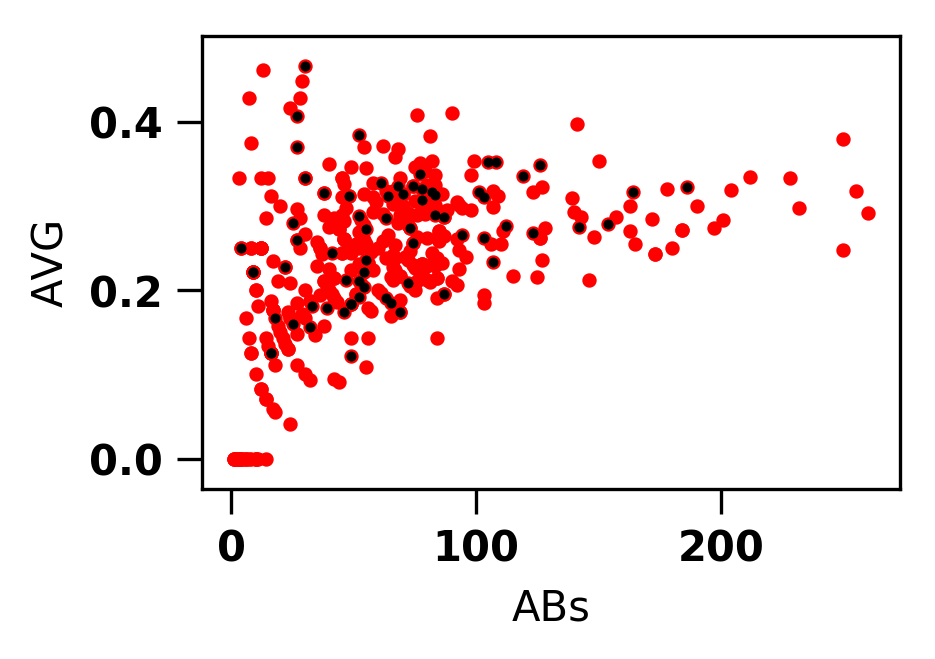

In [79]:
print len(np.unique(players))

#[ G, AB, HR]

Overlap = {}

plt.figure(figsize=(3,2))

plt.scatter(np.array(pstats.values())[:,1],np.array(pstats.values())[:,2]/np.array(pstats.values())[:,1],color='red',s=6.)

for pp in np.unique(players):
    #print pp
    if pp.strip() in HDict.keys():
        #print pp.strip(),pstats[pp.strip()],HDict[pp.strip()]
        plt.scatter([pstats[pp.strip()][1]],[pstats[pp.strip()][2]/pstats[pp.strip()][1]],color='black',s=2.)
        
        
plt.xlabel('ABs')
plt.ylabel('AVG')

398
[u'Jabari Blash' u'Austin Riley' u'Juan Carlos Gamboa' u'Luis Villegas'
 u'Juan Francisco' u'Michael Brosseau' u'Connor Panas'
 u'Willians Astudillo' u'Sebastian Elizalde' u'Alex Jackson'
 u'Franchy Cordero' u'Joey Meneses' u'Randy Arozarena' u'Monte Harrison'
 u'Bryce Brentz' u'T.J. Bennett' u'Ronald Acuna' u'Jesus Aguilar'
 u'Sheldon Neuse' u'Brett Cumberland' u'Gabriel Arias' u'Jake Fraley'
 u'Rodrigo Ayarza' u'Fernando Perez' u'Ryan McBroom']
Jabari Blash
Franchy Cordero
Jesus Aguilar


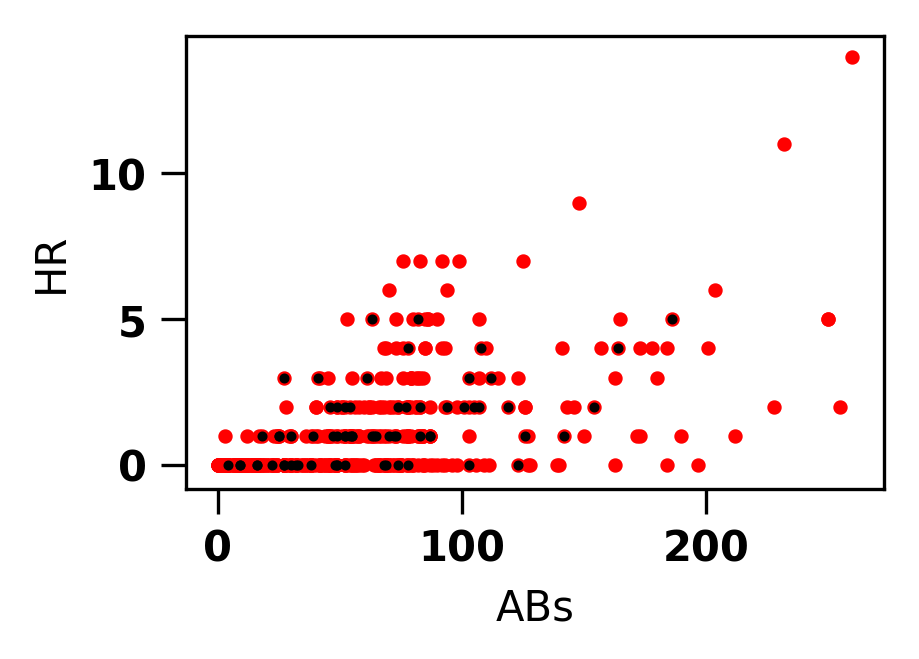

In [84]:
print len(np.unique(players))

#[ G, AB, HR]

Overlap = {}

plt.figure(figsize=(3,2))

plt.scatter(np.array(pstats.values())[:,1],np.array(pstats.values())[:,3],color='red',s=6.)

for pp in np.unique(players):
    #print pp
    if pp.strip() in HDict.keys():
        #print pp.strip(),pstats[pp.strip()],HDict[pp.strip()]
        plt.scatter([pstats[pp.strip()][1]],[pstats[pp.strip()][3]],color='black',s=2.)
        
        
plt.xlabel('ABs')
plt.ylabel('HR')

print np.array(pstats.keys())[np.where(np.array(pstats.values())[:,3] > 4.)]

for name in np.array(pstats.keys())[np.where(np.array(pstats.values())[:,3] > 4.)]:
    if name in HDict.keys(): print name

[u'Juan Carlos Gamboa' u'Willians Astudillo' u'Sebastian Elizalde'
 u'Elvis Escobar' u'Eloy Jimenez' u'Cade Gotta' u'Cameron Perkins'
 u'Omar Carrizales']


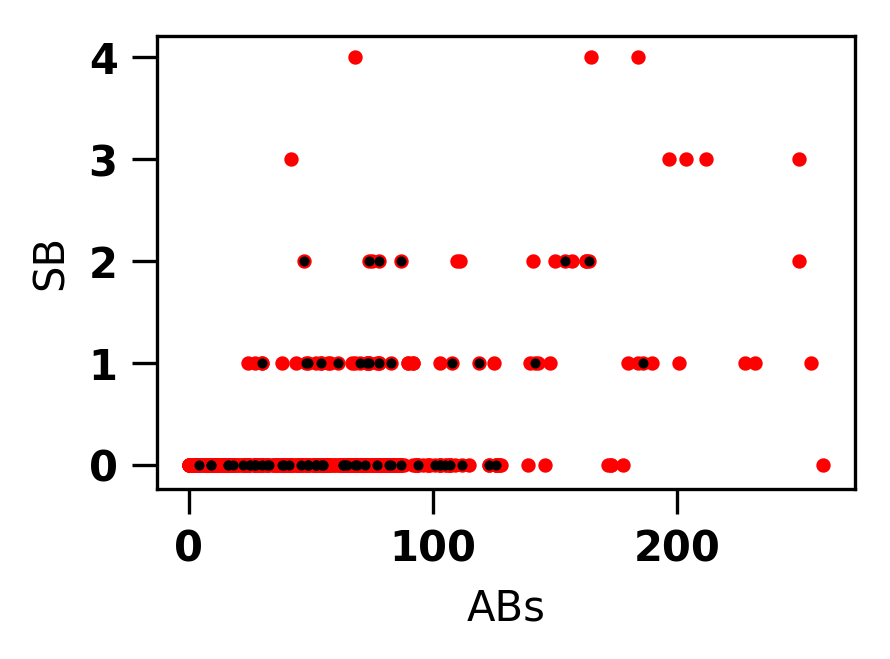

In [82]:

#[ G, AB, HR]


plt.figure(figsize=(3,2))

plt.scatter(np.array(pstats.values())[:,1],np.array(pstats.values())[:,4],color='red',s=6.)

for pp in np.unique(players):
    #print pp
    if pp.strip() in HDict.keys():
        #print pp.strip(),pstats[pp.strip()],HDict[pp.strip()]
        plt.scatter([pstats[pp.strip()][1]],[pstats[pp.strip()][4]],color='black',s=2.)
        
        
plt.xlabel('ABs')
plt.ylabel('SB')


print np.array(pstats.keys())[np.where(np.array(pstats.values())[:,4] > 2.)]

Do the same for pitchers.

In [93]:
teams_short = ['ari','atl','bal','bos','chc','cws','cin','cle','col','det',\
        'hou','kc','ana','la','mia','mil','min','nym','nyy','oak',\
              'phi','pit','sd','sf','sea','stl','tb','tex','tor','was']


players = []
pstats = {}

# 2: PITCHERS  3: CLUB  4: LEAGUE  5: W  6:L  7:ERA  9: G  10: GS  11: CG  12: SHO  13: SV  14: SVO  15: IP  16: H  17: R  18: ER  19:HR  20: HB  21: BB  22: IBB  23: SO  	WP  	GIDP  	WHIP  	AVG 
for team in teams_short:
    print team,
    get_url = 'http://mlb.mlb.com/milb/stats/org.jsp?id='+team

    r  = requests.get(get_url)

    data = r.text

    soup = BeautifulSoup(data)

    tables = [soup.findAll('table')[2]]

    for indx,table in enumerate(tables):

        #print indx,[th.get_text() for th in table.find("tr").find_all("th")]
    
        for row in table.find_all("tr")[1:]:

            sav = [td.get_text() for td in row.find_all("td")]
            #print [float(sav[4]),float(sav[5]),float(sav[10])]
            try:
                #print sav[2].split(',')[1]+' '+sav[2].split(',')[0]
                players.append(sav[2].split(',')[1]+' '+sav[2].split(',')[0])
                teamlist.append(team)
                pstats[(sav[2].split(',')[1]+' '+sav[2].split(',')[0]).strip()] = [float(sav[15]),float(sav[16]),float(sav[19]),float(sav[12]),float(sav[23])]
            except:
                pass

ari atl bal bos chc cws cin cle col det hou kc ana la mia mil min nym nyy oak phi pit sd sf sea stl tb tex tor was


In [94]:
print pstats.keys()

[u'Yapson Gomez', u'Cody Hall', u'Yeison Medina', u'T.J. Weir', u'Jorge Ortega', u'Joey Krehbiel', u'Roberto Gomez', u'Tayler Saucedo', u'Yoanys Quiala', u'Nathan Bates', u'Daury Torrez', u'Nolan Blackwood', u'Mike Mayers', u'Dylan Covey', u'Adbert Alzolay', u'Tristan Archer', u'Zach Jemiola', u'Tom Hackimer', u'Corbin Clouse', u'Jose Dominguez', u'Evan Marshall', u'Adrian Houser', u'Ramon Morla', u'Matt Foster', u'Rodolfo Martinez', u'Jose Valenzuela', u'Esmerling De La Rosa', u'Steven Bruce', u'Walker Lockett', u'Mauricio Llovera', u'Joel Bender', u'Yosmer Solorzano', u'Ranfi Casimiro', u'Ruben Alaniz', u'Tyler Ferguson', u'Kaleb Fleck', u'Tyler Beede', u'Gerardo Reyes', u'D.J. Brown', u'Steven Kent', u'Ben Meyer', u'Junior Rincon', u'Mark Malave', u'Henry Owens', u'Armando Bastardo', u'Touki Toussaint', u'Michael Johnson', u'Shea Spitzbarth', u'Brendan McCurry', u'Luis Pino', u'Oriel L Caicedo', u'Nate Griep', u'Akeem Bostick', u'Rafael De Paula', u'Justin Haley', u'Adonis Rosa', u'

In [95]:

HDict = {}

f = open('2017data/pitcher_data.csv')

for line in f:
    #print line
    try:
        HDict[(line.split(',')[0]).strip()] = float(line.split(',')[12])
    except:
        pass
    
    
print('Found {} hitters by scraping teams.'.format(len(HDict.keys())))

Found 754 hitters by scraping teams.


In [96]:
print HDict.keys()

['Chaz Roe', 'Tim Adleman', 'Chase Anderson', 'Parker Bridwell', 'Roberto Osuna', 'Dylan Covey', 'Daniel Stumpf', 'Jeremy Guthrie', 'Matt Belisle', 'Tony Watson', 'Rafael Montero', 'Emilio Pagan', 'Michael Wacha', 'Zack Greinke', 'Robbie Ray', 'Dustin McGowan', 'Jharel Cotton', 'Ian Krol', 'Joe Blanton', 'Justin Wilson', 'Drew Pomeranz', 'Jeff Hoffman', 'Paul Sewald', 'Jeff Ferrell', 'Luke Sims', 'Jandel Gustave', 'Daniel Coulombe', 'Luis Santos', 'Nate Jones', 'Jack Flaherty', 'Jake Thompson', 'Aaron Blair', 'Wade Miley', 'Aaron Wilkerson', 'Jhan Marinez', 'Sam Moll', 'Yusmeiro Petit', 'Steve Cishek', 'Alex Wood', 'Jason Wheeler', 'Tanner Scheppers', 'Matt Dermody', 'Jonathan Broxton', 'Leonel Campos', 'Thyago Vieira', 'Drew Steckenrider', 'Taylor Williams', 'Chase De Jong', 'Tyler Anderson', 'Arodys Vizcaino', 'Miguel Montero', 'J.P. Howell', 'Tony Barnette', 'Blake Wood', 'Scott Oberg', 'Dan Runzler', 'Jimmy Nelson', 'Peter Moylan', 'Derek Holland', 'Nick Goody', 'Henderson Alvarez'

[u'Walker Lockett' u'Luis Pino' u'Stephen Perakslis' u"Jack O'Loughlin"
 u'Tanner Scott' u'D.J. Johnson' u'Samil De Los Santos']


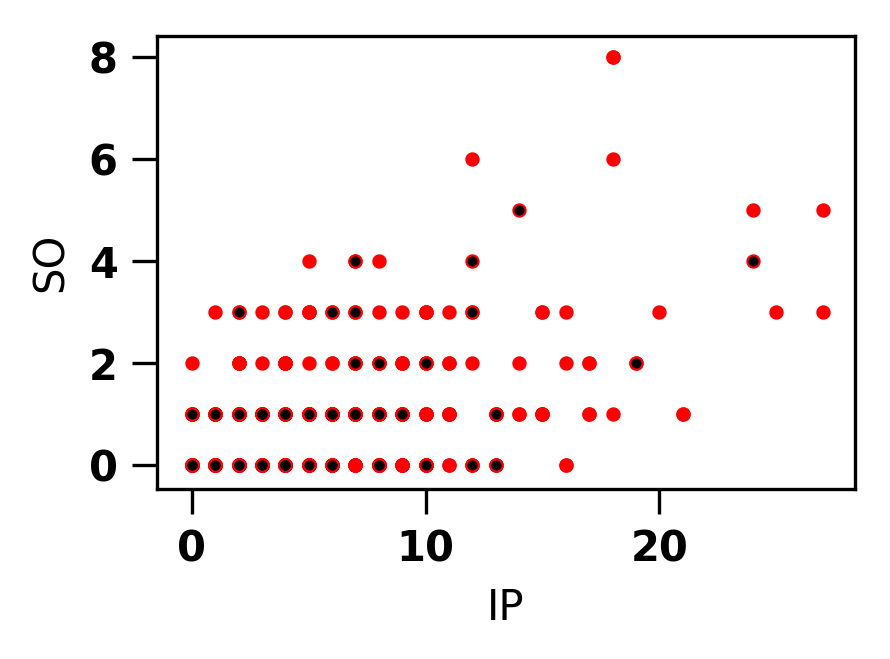

In [98]:

#[ IP, H, HR, SO]


plt.figure(figsize=(3,2))

plt.scatter(np.array(pstats.values())[:,1],np.array(pstats.values())[:,4],color='red',s=6.)

for pp in np.unique(players):
    #print pp
    if pp.strip() in HDict.keys():
        #print pp.strip(),pstats[pp.strip()],HDict[pp.strip()]
        plt.scatter([pstats[pp.strip()][1]],[pstats[pp.strip()][4]],color='black',s=2.)
        
        
plt.xlabel('IP')
plt.ylabel('SO')


print np.array(pstats.keys())[np.where(np.array(pstats.values())[:,4] > 4.)]

[u'Andres Santiago' u'Austin House']


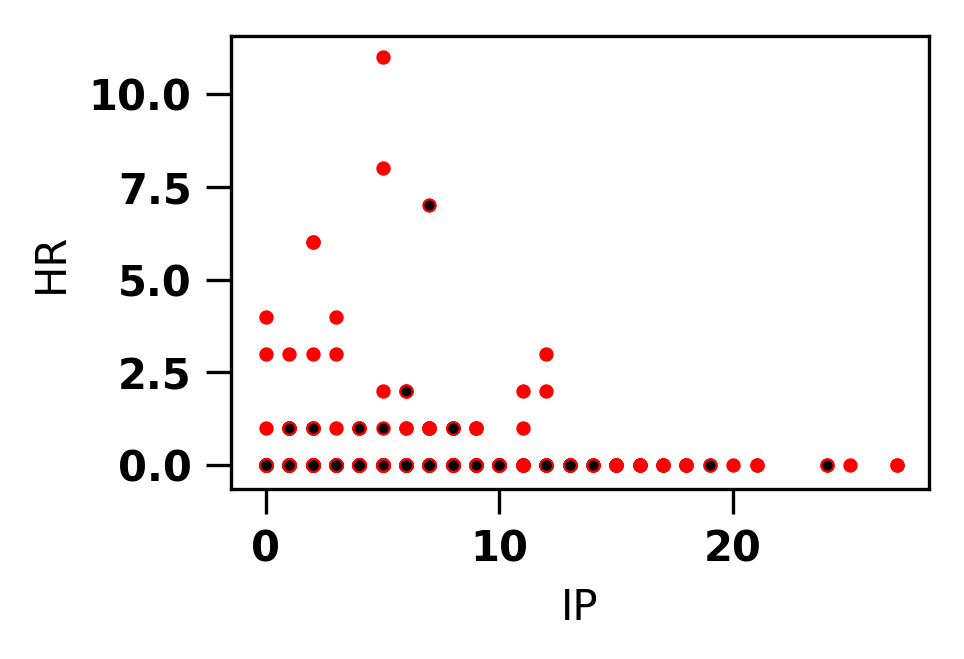

In [104]:

#[ IP, H, HR, SO]


plt.figure(figsize=(3,2))

plt.scatter(np.array(pstats.values())[:,1],np.array(pstats.values())[:,3],color='red',s=6.)

for pp in np.unique(players):
    #print pp
    if pp.strip() in HDict.keys():
        #print pp.strip(),pstats[pp.strip()],HDict[pp.strip()]
        plt.scatter([pstats[pp.strip()][1]],[pstats[pp.strip()][3]],color='black',s=2.)
        
        
plt.xlabel('IP')
plt.ylabel('HR')


print np.array(pstats.keys())[np.where(np.array(pstats.values())[:,3] > 7.)]

[]


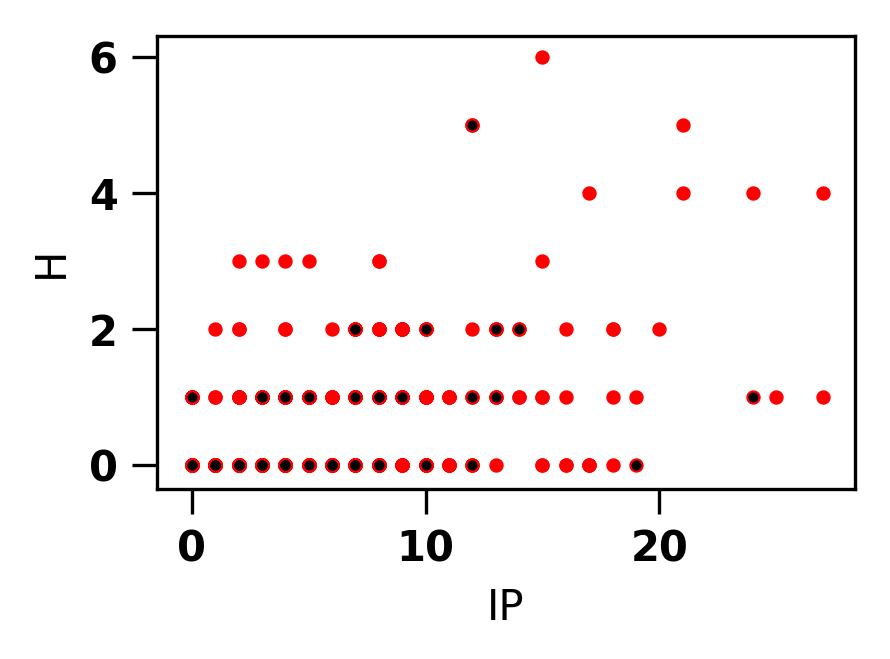

In [102]:

#[ IP, H, HR, SO]


plt.figure(figsize=(3,2))

plt.scatter(np.array(pstats.values())[:,1],np.array(pstats.values())[:,2],color='red',s=6.)

for pp in np.unique(players):
    #print pp
    if pp.strip() in HDict.keys():
        #print pp.strip(),pstats[pp.strip()],HDict[pp.strip()]
        plt.scatter([pstats[pp.strip()][1]],[pstats[pp.strip()][2]],color='black',s=2.)
        
        
plt.xlabel('IP')
plt.ylabel('H')


print np.array(pstats.keys())[np.where(np.array(pstats.values())[:,2] > 15.)]